# ¿Qué vende un coche?

Eres un analista en Crankshaft List. Cientos de anuncios gratuitos de vehículos se publican en tu sitio web cada día. Necesitas estudiar los datos recopilados durante los últimos años y determinar qué factores influyen en el precio de un vehículo.



En esta investigación se realizará un análisis al datset de Crankshaft List para estudiar los datos copilados en los últimos años, y conocer qué factores influyen en el precio de un vehículo, como la edad, el millaje, condición, tipo de transmisión y color.

Por este motivo, se buscará lo siguiente:


1. Abrir el archivo de datos y analizar la información general.
2. Preprocesar los datos.
3. Calcular y añadir tablas para facilitar la investigación.
4. Realizar un análisis exploratorio de datos.
5. Escribir una conclusión general.

## Inicialización

In [1]:
# Cargar todas las librerías
import matplotlib.pyplot as plt
import pandas as pd


### Cargar datos

In [2]:
# Carga el archivo de datos en un DataFrame
vehicles_data = pd.read_csv('/datasets/vehicles_us.csv')
print(vehicles_data)


       price  model_year           model  condition  cylinders fuel  odometer  \
0       9400      2011.0          bmw x5       good        6.0  gas  145000.0   
1      25500         NaN      ford f-150       good        6.0  gas   88705.0   
2       5500      2013.0  hyundai sonata   like new        4.0  gas  110000.0   
3       1500      2003.0      ford f-150       fair        8.0  gas       NaN   
4      14900      2017.0    chrysler 200  excellent        4.0  gas   80903.0   
...      ...         ...             ...        ...        ...  ...       ...   
51520   9249      2013.0   nissan maxima   like new        6.0  gas   88136.0   
51521   2700      2002.0     honda civic    salvage        4.0  gas  181500.0   
51522   3950      2009.0  hyundai sonata  excellent        4.0  gas  128000.0   
51523   7455      2013.0  toyota corolla       good        4.0  gas  139573.0   
51524   6300      2014.0   nissan altima       good        4.0  gas       NaN   

      transmission    type 

### Explorar datos iniciales

El dataset contiene los siguientes campos:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gasolina, diesel, etc.
- `odometer` — el millaje del vehículo cuando el anuncio fue publicado
- `transmission`
- `paint_color`
- `is_4wd` — si el vehículo tiene tracción a las 4 ruedas (tipo Booleano)
- `date_posted` — la fecha en la que el anuncio fue publicado
- `days_listed` — desde la publicación hasta que se elimina



In [3]:
# imprime la información general/resumida sobre el DataFrame
vehicles_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [4]:
# imprimir una muestra de datos
vehicles_data.head(10)


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


<div class="alert alert-success">
<b>✔️ Comentario del revisor:</b> Genail!

<div class="alert alert-warning">
<b>⚠️ Comentario del revisor:</b> Si no necestias todas columnas para analisis entonces puedes eliminar unas

Se puede observar en la información general y en la muestra de datos, que el dataframe posee 51525 filas y trece columnas, lo que es una cantidad considerable, además de distintos tipos de datos, como los enteros, objetos y booleanos; sin embargo, se observó algo curioso, que la columna date_posted no está en formato datetime, sino en object, lo que podría solucionarse rápidamente con una función.

In [5]:
vehicles_data['date_posted'] = pd.to_datetime(vehicles_data['date_posted'], format='%Y-%m-%dT%H:%M')

In [6]:
vehicles_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    47906 non-null  float64       
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     46265 non-null  float64       
 5   fuel          51525 non-null  object        
 6   odometer      43633 non-null  float64       
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   42258 non-null  object        
 10  is_4wd        25572 non-null  float64       
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 5.1+ MB


No se encontraron datos inapropiados en el datset

Se pudo observar que en el datset hay 5 columnas con valores ausentes, siendo la columna  is_4wd con la mayor cantidad de estos valores.

### Conclusiones y siguientes pasos



Después de observar y analizar los datos generales, se pudo concluir que con que haya valores ausentes es normal, pero que la cantidad varie dependiendo la columna no, significa que puede haber más de un motivo por lo que existen estos valores. Por este motivo, para los siguientes pasos, se tratarán estos datos, para después comenzar con el análisis exploratior, y concluir con los hallazgos encontrados en esta investigación.

## Tratar los valores ausentes (si hay)

In [7]:
vehicles_data.loc[vehicles_data['paint_color'].isna()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
12,18990,2012.0,ram 1500,excellent,8.0,gas,140742.0,automatic,pickup,NaN,1.0,2019-04-02,37
21,5250,2007.0,toyota rav4,good,6.0,gas,154000.0,automatic,SUV,NaN,NaN,2018-08-22,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51502,7995,2011.0,chevrolet equinox,like new,4.0,gas,111088.0,automatic,SUV,NaN,NaN,2019-04-01,175
51503,6595,2011.0,chevrolet malibu,excellent,4.0,gas,100780.0,automatic,sedan,NaN,NaN,2019-02-27,73
51506,28900,2017.0,ford f150 supercrew cab xlt,good,6.0,gas,49225.0,automatic,pickup,NaN,1.0,2019-04-11,25
51519,11750,2015.0,honda accord,excellent,4.0,gas,NaN,automatic,coupe,NaN,NaN,2018-11-24,89


In [8]:
vehicles_data.loc[vehicles_data['odometer'].isna()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
15,17990,2013.0,ram 1500,excellent,8.0,gas,NaN,automatic,pickup,red,1.0,2018-05-15,111
23,7500,2004.0,jeep wrangler,good,6.0,gas,NaN,automatic,SUV,red,1.0,2018-05-17,39
24,3950,2009.0,chrysler 200,excellent,4.0,gas,NaN,automatic,sedan,red,NaN,2018-06-11,40
25,11499,2017.0,chevrolet malibu,like new,4.0,gas,NaN,automatic,sedan,NaN,NaN,2018-07-26,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51498,15900,2011.0,gmc sierra 1500,excellent,8.0,gas,NaN,automatic,truck,NaN,1.0,2019-01-25,69
51507,29500,2012.0,toyota tundra,good,8.0,gas,NaN,automatic,pickup,grey,1.0,2018-05-01,31
51516,8999,2011.0,jeep grand cherokee,good,6.0,gas,NaN,automatic,SUV,white,1.0,2018-11-01,51
51519,11750,2015.0,honda accord,excellent,4.0,gas,NaN,automatic,coupe,NaN,NaN,2018-11-24,89


In [9]:
vehicles_data.loc[vehicles_data['is_4wd'].isna()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
11,8990,2012.0,honda accord,excellent,4.0,gas,111142.0,automatic,sedan,grey,NaN,2019-03-28,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71


In [10]:
vehicles_data.loc[vehicles_data['model_year'].isna()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
20,6990,NaN,chevrolet tahoe,excellent,8.0,gas,147485.0,automatic,SUV,silver,1.0,2018-08-05,28
65,12800,NaN,ford f-150,excellent,6.0,gas,108500.0,automatic,pickup,white,NaN,2018-09-23,15
69,7800,NaN,ford f-150,like new,8.0,gas,97510.0,automatic,truck,white,1.0,2019-02-20,39
72,3650,NaN,subaru impreza,excellent,NaN,gas,74000.0,automatic,sedan,blue,1.0,2018-08-07,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51464,8890,NaN,ford f250 super duty,good,8.0,gas,135778.0,automatic,truck,red,1.0,2018-11-28,24
51465,34595,NaN,gmc yukon,excellent,8.0,gas,86456.0,automatic,SUV,silver,1.0,2019-04-18,13
51487,1495,NaN,ford f-150,fair,6.0,gas,15804.0,manual,truck,white,1.0,2018-09-18,56
51488,21900,NaN,chevrolet silverado 3500hd,excellent,8.0,diesel,203000.0,automatic,truck,white,1.0,2018-12-27,37


In [11]:
vehicles_data.loc[vehicles_data['cylinders'].isna()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17
36,10499,2013.0,chrysler 300,good,NaN,gas,88042.0,automatic,sedan,NaN,NaN,2018-05-05,22
37,7500,2005.0,toyota tacoma,good,NaN,gas,160000.0,automatic,pickup,NaN,NaN,2018-07-22,44
59,5200,2006.0,toyota highlander,good,NaN,gas,186000.0,automatic,SUV,green,NaN,2018-12-20,2
63,30000,1966.0,ford mustang,excellent,NaN,gas,51000.0,manual,convertible,red,NaN,2019-01-23,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51429,3250,2004.0,toyota camry,good,NaN,gas,179412.0,automatic,sedan,NaN,NaN,2018-07-02,25
51442,28990,2018.0,ford f150,excellent,NaN,gas,10152.0,automatic,truck,white,1.0,2018-06-13,47
51460,5995,2007.0,ford fusion,excellent,NaN,gas,88977.0,manual,sedan,silver,NaN,2019-03-27,66
51477,6499,2007.0,acura tl,good,NaN,gas,112119.0,automatic,sedan,white,NaN,2018-06-22,28


## Corregir los tipos de datos

In [12]:
vehicles_data['transmission'].loc[vehicles_data['paint_color'].isna()].value_counts()

automatic    8403
manual        514
other         350
Name: transmission, dtype: int64

In [13]:
vehicles_data['paint_color'].value_counts()

white     10029
black      7692
silver     6244
grey       5037
blue       4475
red        4421
green      1396
brown      1223
custom     1153
yellow      255
orange      231
purple      102
Name: paint_color, dtype: int64

In [14]:
vehicles_data['paint_color'] = vehicles_data['paint_color'].fillna('other')
print(vehicles_data['paint_color'].value_counts())

white     10029
other      9267
black      7692
silver     6244
grey       5037
blue       4475
red        4421
green      1396
brown      1223
custom     1153
yellow      255
orange      231
purple      102
Name: paint_color, dtype: int64


In [15]:
median_odometer = vehicles_data['odometer'].median()
vehicles_data['odometer'] = vehicles_data['odometer'].fillna(median_odometer)
print(vehicles_data['odometer'].isna().sum())

0


In [16]:
vehicles_data['is_4wd'].value_counts()

1.0    25572
Name: is_4wd, dtype: int64

In [17]:
vehicles_data['is_4wd'] = vehicles_data['is_4wd'].fillna(0.0)
print(vehicles_data['is_4wd'].value_counts())

0.0    25953
1.0    25572
Name: is_4wd, dtype: int64


In [18]:
vehicles_data['model_year'].value_counts()

2013.0    3549
2012.0    3468
2014.0    3448
2011.0    3375
2015.0    3323
          ... 
1948.0       1
1961.0       1
1936.0       1
1949.0       1
1955.0       1
Name: model_year, Length: 68, dtype: int64

In [19]:
vehicles_data['cylinders'].value_counts()

8.0     15844
6.0     15700
4.0     13864
10.0      549
5.0       272
3.0        34
12.0        2
Name: cylinders, dtype: int64

In [20]:
media_cylinders = vehicles_data['cylinders'].mean()
vehicles_data['cylinders'] = vehicles_data['cylinders'].fillna(media_cylinders)
print(vehicles_data['cylinders'].value_counts())

8.000000     15844
6.000000     15700
4.000000     13864
6.125235      5260
10.000000      549
5.000000       272
3.000000        34
12.000000        2
Name: cylinders, dtype: int64


In [21]:
vehicles_data.isna().sum()

price              0
model_year      3619
model              0
condition          0
cylinders          0
fuel               0
odometer           0
transmission       0
type               0
paint_color        0
is_4wd             0
date_posted        0
days_listed        0
dtype: int64

In [22]:
vehicles_data = vehicles_data.dropna()


In [23]:
vehicles_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47906 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         47906 non-null  int64         
 1   model_year    47906 non-null  float64       
 2   model         47906 non-null  object        
 3   condition     47906 non-null  object        
 4   cylinders     47906 non-null  float64       
 5   fuel          47906 non-null  object        
 6   odometer      47906 non-null  float64       
 7   transmission  47906 non-null  object        
 8   type          47906 non-null  object        
 9   paint_color   47906 non-null  object        
 10  is_4wd        47906 non-null  float64       
 11  date_posted   47906 non-null  datetime64[ns]
 12  days_listed   47906 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 5.1+ MB


In [24]:
vehicles_data['model_year'] = vehicles_data['model_year'].astype('int')
vehicles_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47906 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         47906 non-null  int64         
 1   model_year    47906 non-null  int64         
 2   model         47906 non-null  object        
 3   condition     47906 non-null  object        
 4   cylinders     47906 non-null  float64       
 5   fuel          47906 non-null  object        
 6   odometer      47906 non-null  float64       
 7   transmission  47906 non-null  object        
 8   type          47906 non-null  object        
 9   paint_color   47906 non-null  object        
 10  is_4wd        47906 non-null  float64       
 11  date_posted   47906 non-null  datetime64[ns]
 12  days_listed   47906 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(3), object(6)
memory usage: 5.1+ MB


Se decidió abordar los datos ausentes de diferentes maneras, ya que las columnas donde se encuentran estos valores poseen cantidades distintas; por este motivo, se emplearon distintas funciones para resolverlo. Por ejemplo, para la columna is_4wd, se pudo observar que era columna con datos booleanos binomiales, es decir, 0-1; pero en el dataframe solo se encontró el dato 1, y se entendió que los valores nulos eran 0, rellenandolo con este número. Para la columna paint_color, se decidió reemplazar los valores nulos por el valor 'other', ya que existen varios tipos de colores en el datset, y para rellenar los valores nulos con este valor. Para las columnas odometer y cylinders, se decidió rellenar los valores ausentes con la mediana y la media respectivamente. Y para la columna model_year, se decidió eliminar los datos nulos, ya que se puede entender que no existen estos dato, porque no hay parámetros con los que se pueda relacionar.

## Enriquecer datos

In [25]:
# Agrega valores de fecha y hora para cuando se colocó el anuncio
vehicles_data['weekday'] = vehicles_data['date_posted'].dt.weekday
vehicles_data['year'] = vehicles_data['date_posted'].dt.year
print(vehicles_data.head())




   price  model_year           model  condition  cylinders fuel  odometer  \
0   9400        2011          bmw x5       good        6.0  gas  145000.0   
2   5500        2013  hyundai sonata   like new        4.0  gas  110000.0   
3   1500        2003      ford f-150       fair        8.0  gas  113000.0   
4  14900        2017    chrysler 200  excellent        4.0  gas   80903.0   
5  14990        2014    chrysler 300  excellent        6.0  gas   57954.0   

  transmission    type paint_color  is_4wd date_posted  days_listed  weekday  \
0    automatic     SUV       other     1.0  2018-06-23           19        5   
2    automatic   sedan         red     0.0  2019-02-07           79        3   
3    automatic  pickup       other     0.0  2019-03-22            9        4   
4    automatic   sedan       black     0.0  2019-04-02           28        1   
5    automatic   sedan       black     1.0  2018-06-20           15        2   

   year  
0  2018  
2  2019  
3  2019  
4  2019  
5  201

In [26]:
# Agrega los años del vehículo cuando el anuncio se colocó
vehicles_data['vehicles_years'] = vehicles_data['year'] - vehicles_data['model_year']
print(vehicles_data.head())


   price  model_year           model  condition  cylinders fuel  odometer  \
0   9400        2011          bmw x5       good        6.0  gas  145000.0   
2   5500        2013  hyundai sonata   like new        4.0  gas  110000.0   
3   1500        2003      ford f-150       fair        8.0  gas  113000.0   
4  14900        2017    chrysler 200  excellent        4.0  gas   80903.0   
5  14990        2014    chrysler 300  excellent        6.0  gas   57954.0   

  transmission    type paint_color  is_4wd date_posted  days_listed  weekday  \
0    automatic     SUV       other     1.0  2018-06-23           19        5   
2    automatic   sedan         red     0.0  2019-02-07           79        3   
3    automatic  pickup       other     0.0  2019-03-22            9        4   
4    automatic   sedan       black     0.0  2019-04-02           28        1   
5    automatic   sedan       black     1.0  2018-06-20           15        2   

   year  vehicles_years  
0  2018               7  
2  2

In [27]:
# Agrega el millaje promedio del vehículo por año
vehicles_data['odometer_mean'] = vehicles_data.groupby('days_listed')['odometer'].mean()
print(vehicles_data.head())


   price  model_year           model  condition  cylinders fuel  odometer  \
0   9400        2011          bmw x5       good        6.0  gas  145000.0   
2   5500        2013  hyundai sonata   like new        4.0  gas  110000.0   
3   1500        2003      ford f-150       fair        8.0  gas  113000.0   
4  14900        2017    chrysler 200  excellent        4.0  gas   80903.0   
5  14990        2014    chrysler 300  excellent        6.0  gas   57954.0   

  transmission    type paint_color  is_4wd date_posted  days_listed  weekday  \
0    automatic     SUV       other     1.0  2018-06-23           19        5   
2    automatic   sedan         red     0.0  2019-02-07           79        3   
3    automatic  pickup       other     0.0  2019-03-22            9        4   
4    automatic   sedan       black     0.0  2019-04-02           28        1   
5    automatic   sedan       black     1.0  2018-06-20           15        2   

   year  vehicles_years  odometer_mean  
0  2018        

In [28]:
median_odometer_mean = vehicles_data['odometer_mean'].median()
vehicles_data['odometer_mean'] = vehicles_data['odometer_mean'].fillna(median_odometer_mean)

In [29]:
# Podría ser útil reemplazar los valores de condición con algo que se pueda manipular más fácilmente
vehicles_data['condition'] = vehicles_data['condition'].where(vehicles_data['condition'] != 'excellent', 3)
vehicles_data['condition'] = vehicles_data['condition'].where(vehicles_data['condition'] != 'good', 2)
vehicles_data['condition'] = vehicles_data['condition'].where(vehicles_data['condition'] != 'like new', 4)
vehicles_data['condition'] = vehicles_data['condition'].where(vehicles_data['condition'] != 'fair', 1)
vehicles_data['condition'] = vehicles_data['condition'].where(vehicles_data['condition'] != 'new', 5)
vehicles_data['condition'] = vehicles_data['condition'].where(vehicles_data['condition'] != 'salvage', 0)
print(vehicles_data['condition'].value_counts())


3    23074
2    18695
4     4409
1     1492
5      133
0      103
Name: condition, dtype: int64


In [30]:
vehicles_data['condition'] = vehicles_data['condition'].astype('int')

<div class="alert alert-success">
<b>✔️ Comentario del revisor:</b> Seria mejor si trabajas con DataFrame aqui

## Comprobar datos limpios

In [31]:
# imprime la información general/resumida sobre el DataFrame
vehicles_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 47906 entries, 0 to 51524
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   price           47906 non-null  int64         
 1   model_year      47906 non-null  int64         
 2   model           47906 non-null  object        
 3   condition       47906 non-null  int64         
 4   cylinders       47906 non-null  float64       
 5   fuel            47906 non-null  object        
 6   odometer        47906 non-null  float64       
 7   transmission    47906 non-null  object        
 8   type            47906 non-null  object        
 9   paint_color     47906 non-null  object        
 10  is_4wd          47906 non-null  float64       
 11  date_posted     47906 non-null  datetime64[ns]
 12  days_listed     47906 non-null  int64         
 13  weekday         47906 non-null  int64         
 14  year            47906 non-null  int64         
 15  ve

In [32]:
# imprimir una muestra de datos
vehicles_data.head(10)


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday,year,vehicles_years,odometer_mean
0,9400,2011,bmw x5,2,6.000000,gas,145000.0,automatic,SUV,other,1.0,2018-06-23,19,5,2018,7,118666.080000
2,5500,2013,hyundai sonata,4,4.000000,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,3,2019,6,110782.720339
3,1500,2003,ford f-150,1,8.000000,gas,113000.0,automatic,pickup,other,0.0,2019-03-22,9,4,2019,16,120651.643646
4,14900,2017,chrysler 200,3,4.000000,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,1,2019,2,114710.087591
5,14990,2014,chrysler 300,3,6.000000,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15,2,2018,4,113261.894624
6,12990,2015,toyota camry,3,4.000000,gas,79212.0,automatic,sedan,white,0.0,2018-12-27,73,3,2018,3,115649.280423
7,15990,2013,honda pilot,3,6.000000,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68,0,2019,6,116530.244240
8,11500,2012,kia sorento,3,4.000000,gas,104174.0,automatic,SUV,other,1.0,2018-07-16,19,0,2018,6,115935.683748
9,9200,2008,honda pilot,3,6.125235,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17,4,2019,11,113155.094477
10,19500,2011,chevrolet silverado 1500,3,8.000000,gas,128413.0,automatic,pickup,black,1.0,2018-09-17,38,0,2018,7,116431.603261


## Estudiar parámetros principales



Los parámetros son:
- Precio
- Los años del vehículo cuando el anuncio se colocó
- Millaje
- Número de cilindros
- Estado

[[<AxesSubplot:title={'center':'price'}>]]


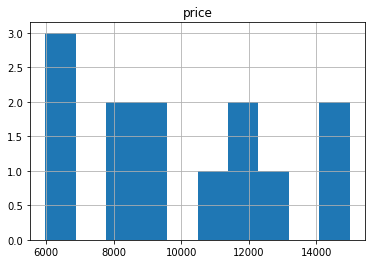

In [33]:
#observar la distribución de la mediana de los precios de los autos según el tipo
median_stat_price = vehicles_data.pivot_table(index='type', values='price', aggfunc='median')
print(median_stat_price.hist('price'))



[[<AxesSubplot:title={'center':'vehicles_years'}>]]


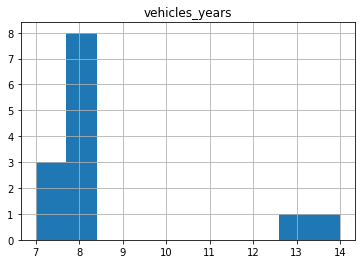

In [34]:
#observar la distribución de la mediana de los años de los vehículos de los autos según el tipo
median_stat_years = vehicles_data.pivot_table(index='type', values='vehicles_years', aggfunc='median')
print(median_stat_years.hist('vehicles_years'))


[[<AxesSubplot:title={'center':'odometer'}>]]


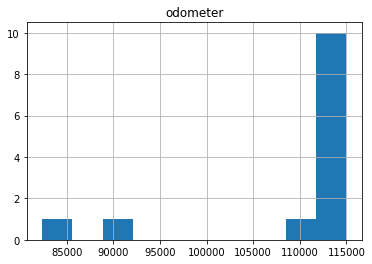

In [35]:
#observar la distribución de la mediana de los millajes medios de los autos según el tipo
median_stat_odometer = vehicles_data.pivot_table(index='type', values='odometer', aggfunc='median')
print(median_stat_odometer.hist('odometer'))



[[<AxesSubplot:title={'center':'cylinders'}>]]


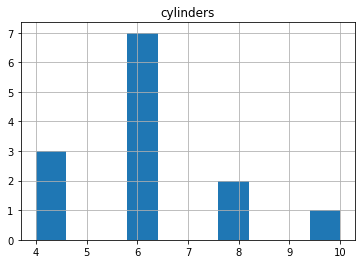

In [36]:
#observar la distribución de la mediana del número de cilindros de los autos según el tipo
median_stat_cylinders = vehicles_data.pivot_table(index='type', values='cylinders', aggfunc='median')
print(median_stat_cylinders.hist('cylinders'))



[[<AxesSubplot:title={'center':'price'}>]]


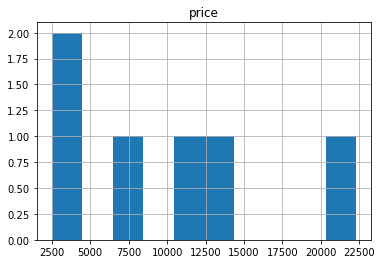

In [37]:
#observar la distribución de la mediana de los precios de los autos según el estado
median_stat_condition = vehicles_data.pivot_table(index='condition', values='price', aggfunc='median')
print(median_stat_condition.hist('price'))



[[<AxesSubplot:title={'center':'condition'}>]]


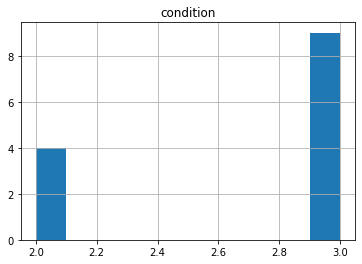

In [38]:
#observar la distribución de la mediana de los millajes medios de los autos según el estado
median_stat_condition = vehicles_data.pivot_table(index='type', values='condition', aggfunc='median')
print(median_stat_condition.hist('condition'))



## Estudiar y tratar valores atípicos


Después de analizar la distribución de las medianas de los valores en los histogramas, se pudo observar que las columnas de precio y la de los millajes, pueden tener valores atípicos, ya que se pudo ver como anomalías en sus histogramas.

In [39]:
# Determina los límites inferiores para valores atípicos
price_inferior_lim = 6000
odometer_inferior_lim = 65000


In [40]:
# Determinar los límites superiores para valores atípicos
price_superior_lim = 20000
odometer_superior_lim = 120500



In [41]:
# Almacena los datos sin valores atípicos en un DataFrame separado
good_vehicles_data = vehicles_data.query('@price_inferior_lim < price < @price_superior_lim')
good_vehicles_stat1 = good_vehicles_data.pivot_table(index='type', values='price', aggfunc='median')
print(good_vehicles_stat1)
good_vehicles_data2 = vehicles_data.query('@odometer_inferior_lim < odometer < @odometer_superior_lim')
good_vehicles_stat2 = good_vehicles_data2.pivot_table(index='type', values='odometer', aggfunc='median')
print(good_vehicles_stat2)

               price
type                
SUV          10995.0
bus           7700.0
convertible  12997.5
coupe        13000.0
hatchback     8900.0
mini-van      9900.0
offroad      11450.0
other         9995.0
pickup       12495.0
sedan         9250.0
truck        13490.0
van           9597.5
wagon        10495.0
             odometer
type                 
SUV          110250.0
bus          111352.5
convertible  104126.5
coupe        108000.0
hatchback    110000.0
mini-van     109396.0
offroad      112399.0
other        107900.0
pickup       112030.5
sedan        106600.0
truck        111000.0
van          113000.0
wagon        111707.5


## Estudiar parámetros principales sin valores atípicos

[[<AxesSubplot:title={'center':'price'}>]]
[[<AxesSubplot:title={'center':'price'}>]]


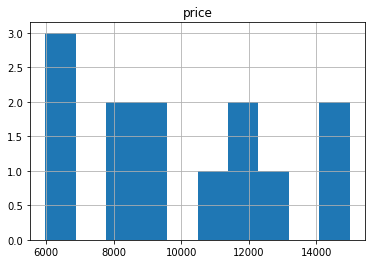

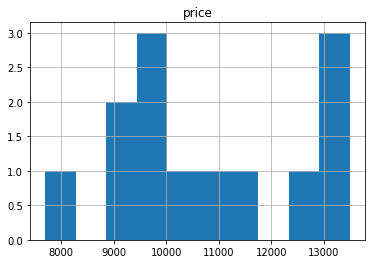

In [42]:
print(median_stat_price.hist('price'))
print(good_vehicles_stat1.hist('price'))

En esta comparación, se puede observar que en el segundo histograma con los datos filtrados que la mediana de los precios está mayor concentrado en los precios de 9000 a 10000, y que los valores atípicos se han reducido, ya que la distribución de los precios medianos según el tipo de auto se ve más coherente.

[[<AxesSubplot:title={'center':'odometer'}>]]
[[<AxesSubplot:title={'center':'odometer'}>]]


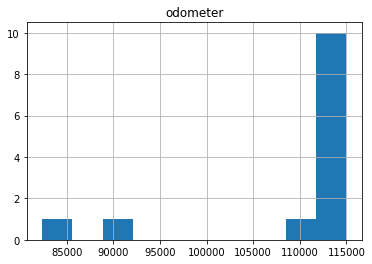

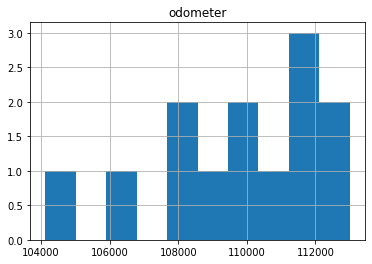

In [43]:
print(median_stat_odometer.hist('odometer'))
print(good_vehicles_stat2.hist('odometer'))

En estos histogramas de los millajes medios según el tipo de carro, se puede observar que en el segundo con los datos filtrados, existe una mayor concentración de la mediana de los millajes medios en 113000, y que los valores están mejores distribuidos que en el primero sin los datos filtrados.

## Periodo de colocación de los anuncios



In [44]:
vehicles_data['days_listed'].describe()

count    47906.000000
mean        39.564835
std         28.201967
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

array([[<AxesSubplot:title={'center':'days_listed'}>]], dtype=object)

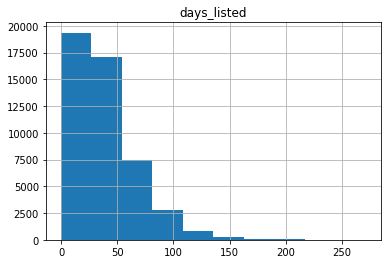

In [45]:
vehicles_data.hist('days_listed', bins=10)

array([[<AxesSubplot:title={'center':'days_listed'}>]], dtype=object)

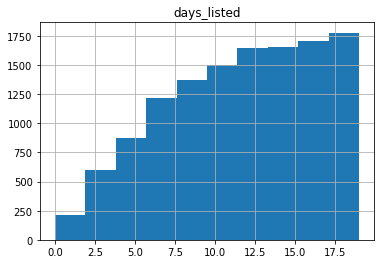

In [46]:
vehicles_data.hist('days_listed', bins=10, range=(0,19))

Después de analizar la media y mediana, se pudo observar gracias al histograma que los días en que los anuncios duraron menos fueron entre 0 a 19 días, siendo este último el día más corto que duraron desde que se publicaron, ya que ahí es donde se concentran la mayor cantidad de valores; sin embargo, según el gráfico hay anuncios que no duraron ni un día.

array([[<AxesSubplot:title={'center':'days_listed'}>]], dtype=object)

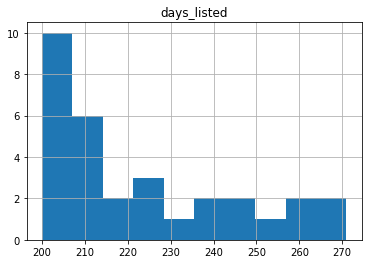

In [47]:
vehicles_data.hist('days_listed', bins=10, range=(200,271))

En los días que duraron los anuncios desde su publicación, que van desde los 200 a los 271 días máximo, siendo 205 días donde más se concentran los datos; estos datos se consideran excesivamente largos, ya que tienen una gran diferencia con la media y la mediana de esta columna, asi como el tercer cuartil, que siendo este donde puede haber la mayor concentración de valores máximos; este rango de 200 a 271 días tienen una gran diferencia, y por este motivo, se consideran excesivamente largos.

## Precio promedio por cada tipo de vehículo

47906
                     mean  count
                    price  price
type                            
SUV          11162.924256  11486
bus          17135.666667     24
convertible  14448.930788    419
coupe        14340.695551   2158
hatchback     6892.285421    974
mini-van      8145.328372   1075
offroad      14227.946078    204
other        10873.666667    234
pickup       16169.763880   6484
sedan         6995.972758  11306
truck        16753.880090  11517
van          10286.612795    594
wagon         9089.562544   1431
AxesSubplot(0.125,0.125;0.775x0.755)


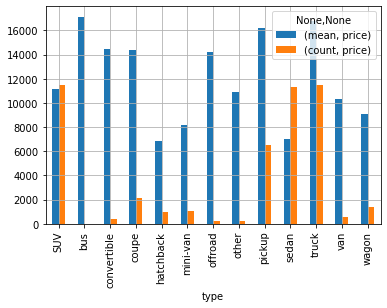

In [48]:
#Número de anuncios
print(len(vehicles_data))

#precio promedio y número de anuncios para cada tipo de vehículo
avg_price_and_ads_num = vehicles_data.pivot_table(index='type', values='price', aggfunc=['mean', 'count'])
print(avg_price_and_ads_num)

#Gráfico
print(avg_price_and_ads_num.plot(kind='bar', grid=True))

Los tipos de autos con mayor número de anuncios son del tipo SUV y Truck

## Factores de precio

                   price  model_year  condition  cylinders  odometer  \
price           1.000000    0.563558   0.266567   0.071464 -0.485247   
model_year      0.563558    1.000000   0.332272  -0.221482 -0.542063   
condition       0.266567    0.332272   1.000000  -0.075575 -0.311450   
cylinders       0.071464   -0.221482  -0.075575   1.000000  0.169104   
odometer       -0.485247   -0.542063  -0.311450   0.169104  1.000000   
is_4wd          0.127193   -0.056578  -0.009729   0.122736  0.012962   
days_listed    -0.014933   -0.014813  -0.016137   0.016713  0.012271   
weekday         0.003968   -0.006360   0.008797  -0.011821  0.008833   
year            0.003049    0.013115  -0.000415   0.004575 -0.007769   
vehicles_years -0.561990   -0.996582  -0.331531   0.221343  0.540156   
odometer_mean   0.003054    0.005060  -0.001675  -0.012646 -0.003676   

                  is_4wd  days_listed   weekday      year  vehicles_years  \
price           0.127193    -0.014933  0.003968  0.003049 

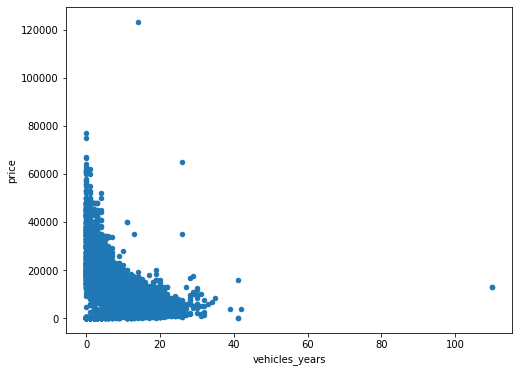

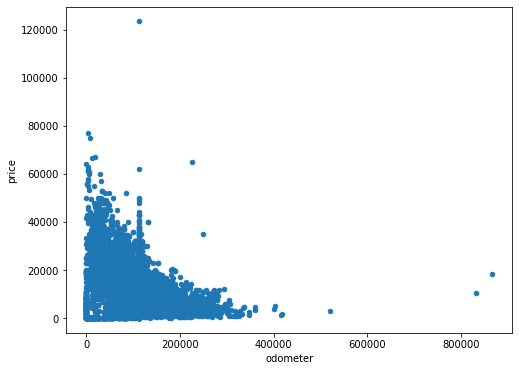

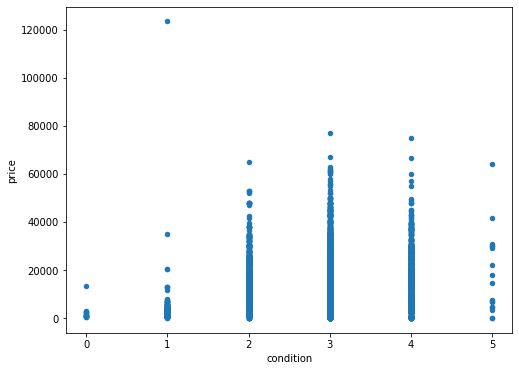

In [49]:
# factores que impactan en el precio de SUV.
suv_vehicle = vehicles_data.query('type == "SUV"')
print(suv_vehicle.corr())
#diagramas 
print(suv_vehicle.plot(x='vehicles_years', y='price', kind='scatter', figsize=(8,6)))
print(suv_vehicle.plot(x='odometer', y='price', kind='scatter', figsize=(8,6)))
print(suv_vehicle.plot(x='condition', y='price', kind='scatter', figsize=(8,6)))





In [54]:
#diagramas de cajas
suv_paint_color = suv_vehicle.pivot_table(index='paint_color', values='price', aggfunc='count')

suv_transmission =  suv_vehicle.pivot_table(index='transmission', values='price', aggfunc='count')
print(suv_paint_color)
print(suv_transmission)

             price
paint_color       
black         2069
blue           968
brown          332
custom         287
green          399
grey          1105
orange          73
other         2081
purple          37
red            851
silver        1434
white         1806
yellow          44
              price
transmission       
automatic     10864
manual          471
other           151


In [57]:
final_suv_color = suv_paint_color.query('price >= 50').pivot_table(index='paint_color', values=good_vehicles_stat1, aggfunc='sum')
print(final_suv_color)


             price
paint_color       
black         2069
blue           968
brown          332
custom         287
green          399
grey          1105
orange          73
other         2081
red            851
silver        1434
white         1806


AxesSubplot(0.125,0.125;0.775x0.755)


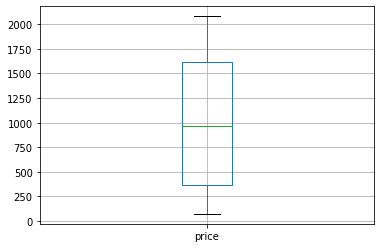

In [58]:
print(final_suv_color.boxplot())


In [60]:
suv_transmission.pivot_table(index='transmission', values=good_vehicles_stat1, aggfunc='sum')

,price
transmission,
automatic,10864
manual,471
other,151


AxesSubplot(0.125,0.125;0.775x0.755)


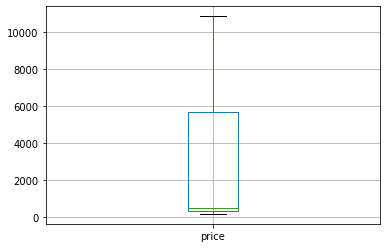

In [61]:
print(suv_transmission.boxplot())

                   price  model_year  condition  cylinders  odometer  \
price           1.000000    0.567374   0.306022  -0.014597 -0.397522   
model_year      0.567374    1.000000   0.363048  -0.008599 -0.480336   
condition       0.306022    0.363048   1.000000  -0.015617 -0.304975   
cylinders      -0.014597   -0.008599  -0.015617   1.000000  0.000866   
odometer       -0.397522   -0.480336  -0.304975   0.000866  1.000000   
is_4wd          0.242199    0.177429   0.117603   0.136773 -0.073344   
days_listed     0.005432   -0.012974   0.001294   0.000969  0.004427   
weekday        -0.006917   -0.004576   0.004186  -0.015529  0.003518   
year            0.001540    0.005353   0.006408   0.005014  0.002411   
vehicles_years -0.565811   -0.997042  -0.361631   0.008962  0.479298   
odometer_mean   0.001701   -0.009849  -0.003954   0.006321 -0.006276   

                  is_4wd  days_listed   weekday      year  vehicles_years  \
price           0.242199     0.005432 -0.006917  0.001540 

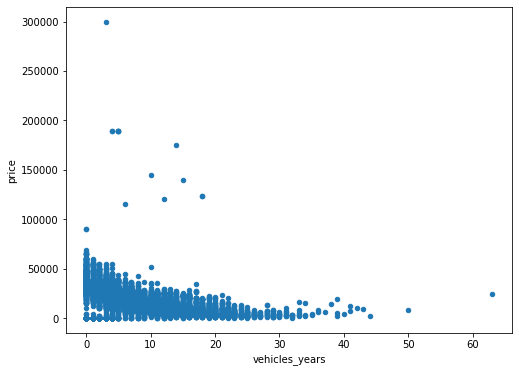

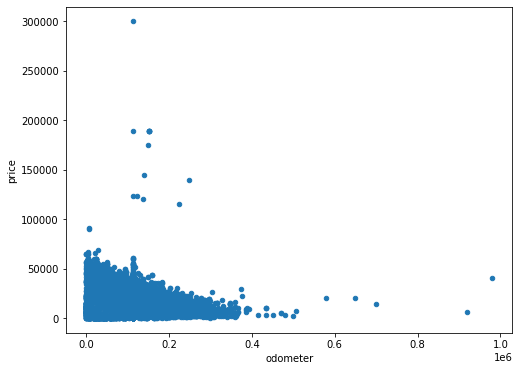

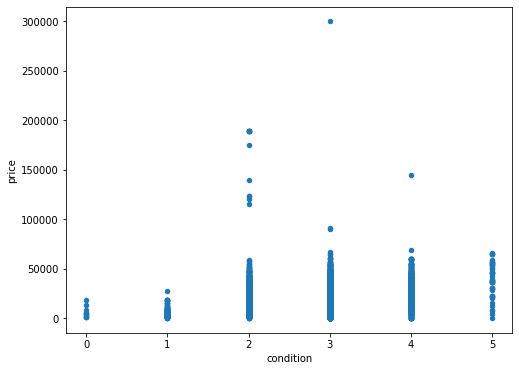

In [62]:
#factores que impactan en el precio de truck
truck_vehicle = vehicles_data.query('type == "truck"')
print(truck_vehicle.corr())
#diagramas 
print(truck_vehicle.plot(x='vehicles_years', y='price', kind='scatter', figsize=(8,6)))
print(truck_vehicle.plot(x='odometer', y='price', kind='scatter', figsize=(8,6)))
print(truck_vehicle.plot(x='condition', y='price', kind='scatter', figsize=(8,6)))

In [66]:
#Diagramas de cajas
truck_paint_color = truck_vehicle.pivot_table(index='paint_color', values=good_vehicles_stat1, aggfunc='count')

truck_transmission =  truck_vehicle.pivot_table(index='transmission', values=good_vehicles_stat1, aggfunc='count')
print(truck_paint_color)
print(truck_transmission)

             price
paint_color       
black         1456
blue           820
brown          237
custom         297
green          254
grey           903
orange          46
other         1982
purple          16
red           1003
silver         969
white         3471
yellow          63
              price
transmission       
automatic     10913
manual          411
other           193


In [65]:
final_truck_color = suv_paint_color.query('price >= 50').pivot_table(index='paint_color', values=good_vehicles_stat1, aggfunc='sum')
final_truck_color

,price
paint_color,
black,2069
blue,968
brown,332
custom,287
green,399
grey,1105
orange,73
other,2081
red,851


AxesSubplot(0.125,0.125;0.775x0.755)


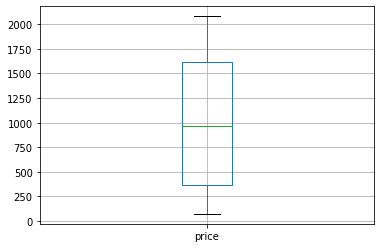

In [67]:
print(final_truck_color.boxplot())

In [68]:
truck_transmission.pivot_table(index='transmission', values=good_vehicles_stat1, aggfunc='sum')

,price
transmission,
automatic,10913
manual,411
other,193


AxesSubplot(0.125,0.125;0.775x0.755)


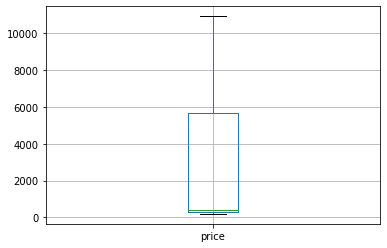

In [69]:
print(truck_transmission.boxplot())

## Conclusión general



Después de analizar el dataset se pudo concluir lo siguiente:

1. Se encontraron valores ausentes en algunas columnas del dataframe, como la de model_year, odometer, y otras tres más. Esto pudo ocurrir debido a factores que pueden influenciar estos datos como el tipo de auto o la condición; o por errores de digitación, en el caso de una columna. Por este motivo, se decidió lidiar con estos datos de distintas formas, ya que la cantidad variaba según la columna; en algunos casos se reemplazaron por valores que podrían resultar más lógicos, como en el caso del tipo de color; en otros se rellenaron con la mediana, como en el caso del millaje; y así sucesivamente.
2. No se encontraron datos duplicados.
3. En algunas columnas, se pudieron encontrar datos atípicos, como en el precio o en los años del vehículo desde su publicación; esto se pudo observar despúes de realizar los gráficos, en estos se pudo ver como algunos datos tenían diferencias significantes con los otros datos. Por este motivo, para resolver estos datos, se decidió segmentarlo, especificando los rangos o límites inferiores y superiores, para concentrar estos datos en valores medianos.

Asimismo, se comprobaron las siguientes correlaciones:

1. El precio se ve influenciado por el tipo de auto, siendo el SUV el tipo con mayor precio, además de ser el tipo de auto con la mayor cantidad de anuncios, a su vez, el tipo de color y el tipo de transmissión, también influyen en el precio, siendo el color blanco y de transmisión automática, los tipos que mayores precios poseen, es decir sí poseen correlación.
2. En otro lugar, el millaje tambien posee una correlación considerable con el precio, aunque de forma negativa, pero siguen siendo dependientes entre ambos.
3. También se pudo observar que los años del vehículo desde que se publicó el anuncio del auto, influye en el precio, es decir, tambien existe correlación entre ambas variables.
4. La condición del auto influye de forma notoria en el precio, siendo los autos nuevos con mayor cantidad de precio, por lo tanto, su correlación es fuerte.

Por último, se puede decir que el precio sí se ve influenciado por distintos factores.